<a href="https://colab.research.google.com/github/Winn555/UAS_AI/blob/main/UAS_WinkyAdinata_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
# Load dataset
file_path = "/content/netflix_titles.csv"
df = pd.read_csv(file_path)

In [5]:
# Data preprocessing
# Fill missing values
for col in ['director', 'cast', 'country', 'date_added', 'rating']:
    df[col].fillna('Unknown', inplace=True)
df.fillna({'release_year': df['release_year'].median()}, inplace=True)

<ipython-input-5-4e289ff88a7a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [6]:
# Encode categorical features
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['rating'] = le.fit_transform(df['rating'])
df['country'] = le.fit_transform(df['country'])
df['release_year'] = df['release_year'].astype(int)


In [7]:
# Select relevant features
features = ['type', 'release_year', 'rating', 'country']
data = df[features]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [8]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

In [9]:
# Finding optimal K using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

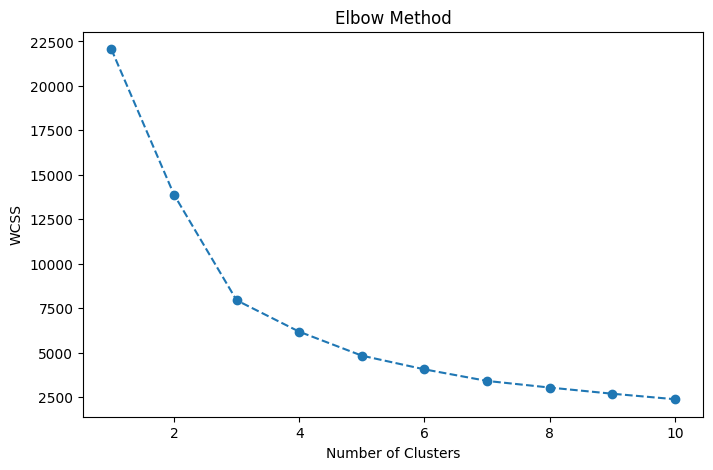

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [11]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(data_pca)

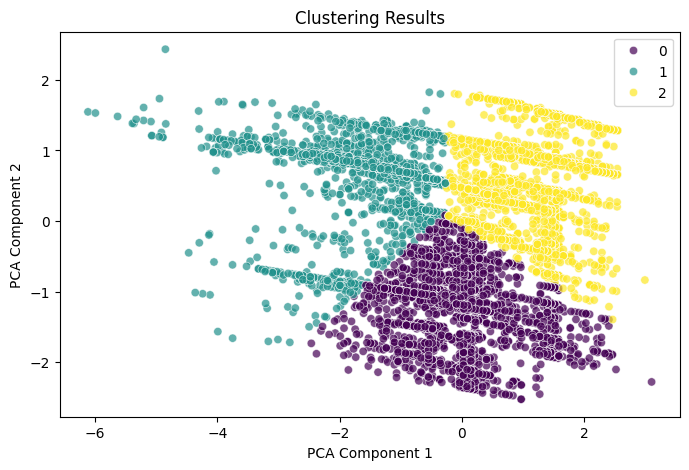

In [12]:
# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results')
plt.legend()
plt.show()

In [14]:
# Save clustered dataset
df.to_csv("/content/netflix_titles.csv", index=False)